<div style="display: flex; align-items: center;">
    <img alt="udeA logo" height="140px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width:107px;height:152px; margin-right: 40px;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Sistema Predictor de grupos relacionados por el diagnóstico</font></b></h1>
        <h1><b><font color='0B5345'>Modelo Baseline</font></b></h1>
        <h2><font color='0B5345'>Luisa Enciso - María Ostos - Santiago Rivera</font></h2>
    </div>
</div>


In [ ]:
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler


<hr>

# **Inspección de la base de datos**

In [48]:
# Ruta del archivo Excel
archivo_excel = 'DataBase.xlsx'
# Cargar el archivo Excel
df = pd.read_excel(archivo_excel, engine='openpyxl')
# Mostrar las primeras filas
df.head()

,Num caso,Aseguradora -Código-,Aseguradora -Descripción-,Edad,Grupo Edad,Sexo,Codigo de ciudad,Fecha de ingreso,Tipo de ingreso,Fecha de egreso,...,Proc28,Proc29,Proc30,Tipo servicio,Causa Basica de muerte,Infecciones,Infección Quirurgica,GRD -Código,GRD -Descripción,Tipo GRD
0,413799.0,204,Aseguradora_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC,M
1,412359.0,313,Aseguradora_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,Aseguradora_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,Aseguradora_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,Aseguradora_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMÁTIC...,M


In [ ]:
df_informe = pd.read_excel(archivo_excel, engine='openpyxl')
df_informe

,Num caso,Aseguradora -Código-,Aseguradora -Descripción-,Edad,Grupo Edad,Sexo,Codigo de ciudad,Fecha de ingreso,Tipo de ingreso,Fecha de egreso,...,Proc28,Proc29,Proc30,Tipo servicio,Causa Basica de muerte,Infecciones,Infección Quirurgica,GRD -Código,GRD -Descripción,Tipo GRD
0,413799.0,204,Aseguradora_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC,M
1,412359.0,313,Aseguradora_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,Aseguradora_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,Aseguradora_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,Aseguradora_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMÁTIC...,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,162762.0,233,Aseguradora_68,23,20-24,F,5088,29122005,URGENCIA,31122005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,34131,"MH EPIGLOTITIS, OTITIS MEDIA, INFECCIONES DEL ...",M
27865,162763.0,111,Aseguradora_37,64,60-64,M,5088,30122005,URGENCIA,31122005,...,NaN,NaN,NaN,CIRUGÍA,NaN,NO,NO,61203,PH PROCEDIMIENTOS COMPLEJOS INTESTINALES w/MCC,Q
27866,162764.0,270,Aseguradora_22,8,5-9,f,5887,30122005,URGENCIA,31122005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,31202,"PH OTROS PROCEDIMIENTOS DE OÍDOS, NARIZ, BOCA ...",Q
27867,162765.0,6,Aseguradora_57,21,20-24,M,5628,30122005,URGENCIA,31122005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,91301,PH INJERTO DE PIEL SIN QUEMADURAS,Q


]

In [ ]:
# ====================================================================
# 1. LIMPIEZA BÁSICA DE TEXTO
# ====================================================================
# Se estandarizan los textos a mayúsculas y se eliminan las tildes,
# aplicando esta limpieza únicamente a las columnas de tipo string
# (sin afectar columnas numéricas). Además, se normalizan los nombres
# de las columnas.
# ====================================================================

def limpiar_texto(texto):
    if isinstance(texto, str):
        texto = texto.upper()
        texto = unicodedata.normalize('NFKD', texto)
        texto = ''.join([c for c in texto if not unicodedata.combining(c)])
        return texto
    return texto

# Aplicar solo a columnas de texto
columnas_texto = df.select_dtypes(include='object').columns
df[columnas_texto] = df[columnas_texto].applymap(limpiar_texto)

# Limpiar nombres de columnas
df.columns = [limpiar_texto(col) for col in df.columns]

df.head()


C:\Users\Juan Melo\AppData\Local\Temp\ipykernel_19240\3508867996.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[columnas_texto] = df[columnas_texto].applymap(limpiar_texto)


,NUM CASO,ASEGURADORA -CODIGO-,ASEGURADORA -DESCRIPCION-,EDAD,GRUPO EDAD,SEXO,CODIGO DE CIUDAD,FECHA DE INGRESO,TIPO DE INGRESO,FECHA DE EGRESO,...,PROC28,PROC29,PROC30,TIPO SERVICIO,CAUSA BASICA DE MUERTE,INFECCIONES,INFECCION QUIRURGICA,GRD -CODIGO,GRD -DESCRIPCION,TIPO GRD
0,413799.0,204,ASEGURADORA_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC,M
1,412359.0,313,ASEGURADORA_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,ASEGURADORA_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,ASEGURADORA_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,ASEGURADORA_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...,M


In [ ]:
# =============================================================================
# 2. NORMALIZACIÓN DE VALORES EQUIVALENTES
# =============================================================================
# Se unifican valores semánticamente equivalentes que presentan
# diferencias en su escritura. Ejemplo: "URGENCIAS PEDIATRICAS" → "URGENCIA".
# Esta etapa mejora la consistencia y reduce la cardinalidad de las categorías.
# =============================================================================

normalizaciones = {
    'TIPO DE INGRESO': {
        'URGENCIAS': 'URGENCIA',
        'URGENCIA ADULTOS': 'URGENCIA',
        'U. ADULTOS': 'URGENCIA',
        'URGENCIA PEDIATRICA': 'URGENCIA',
        'URGENCIA OBSTETRICA': 'URGENCIA',
    },
    'SITUACION AL ALTA': {
        'MUERTO': 'FALLECIDO',
        'DEFUNCION': 'FALLECIDO',
    },
    'SERVICIOALTA': {
        'URGENCIAS': 'URGENCIA',
        'U. ADULTOS': 'URGENCIA',
    }
}

for columna, reemplazos in normalizaciones.items():
    if columna in df.columns:
        df[columna] = df[columna].replace(reemplazos)

print("Valores equivalentes normalizados.")
df.head()

Valores equivalentes normalizados.


,NUM CASO,ASEGURADORA -CODIGO-,ASEGURADORA -DESCRIPCION-,EDAD,GRUPO EDAD,SEXO,CODIGO DE CIUDAD,FECHA DE INGRESO,TIPO DE INGRESO,FECHA DE EGRESO,...,PROC28,PROC29,PROC30,TIPO SERVICIO,CAUSA BASICA DE MUERTE,INFECCIONES,INFECCION QUIRURGICA,GRD -CODIGO,GRD -DESCRIPCION,TIPO GRD
0,413799.0,204,ASEGURADORA_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO W/MCC,M
1,412359.0,313,ASEGURADORA_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,ASEGURADORA_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,ASEGURADORA_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCION POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,ASEGURADORA_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMATIC...,M


In [ ]:
# Columnas con muchos nulos
umbral_nan = 0.7
columnas_a_eliminar = df.columns[df.isna().mean() > umbral_nan].tolist()

# Columnas con un solo valor
columnas_un_valor = [col for col in df.columns if df[col].nunique() == 1]
# Unificar y eliminar
todas_a_eliminar = list(set(columnas_a_eliminar + columnas_un_valor))
df = df.drop(columns=[col for col in todas_a_eliminar if col in df.columns])
print(f"Columnas eliminadas: {todas_a_eliminar}")
df.head()

Columnas eliminadas: []


,NUM CASO,ASEGURADORA -CODIGO-,ASEGURADORA -DESCRIPCION-,EDAD,GRUPO EDAD,SEXO,CODIGO DE CIUDAD,FECHA DE INGRESO,TIPO DE INGRESO,FECHA DE EGRESO,...,SITUACION AL ALTA,PROC1,PROC2,PROC3,TIPO SERVICIO,INFECCIONES,INFECCION QUIRURGICA,GRD -CODIGO,GRD -DESCRIPCION,TIPO GRD
0,413799.0,204,759,38,942,0,5001,30052005,0,19062005,...,0.0,43.11,54.91,87.44,24836.0,0,0,14143,54,0
1,412359.0,313,5080,27,1047,1,5088,11032005,0,10042005,...,0.0,87.44,NaN,NaN,2349.0,0,0,184153,59,0
2,412552.0,313,5080,39,942,1,5001,20032005,0,10042005,...,0.0,38.93,45.23,87.44,24836.0,0,0,184153,59,0
3,414131.0,227,13322,24,1073,1,5001,20062005,0,22062005,...,0.0,88.01,NaN,NaN,24836.0,0,0,184153,59,0
4,410573.0,227,13322,60,2195,1,5001,24112004,0,7012005,...,0.0,45.16,87.44,88.79,24836.0,0,0,184112,55,0


In [ ]:
# ================================================================
# 3. CODIFICACIÓN DE VARIABLES
# ================================================================
# - Variables binarias: codificar con 0 y 1.
# - Variables categóricas frecuentes: codificar por frecuencia.
# ================================================================

from sklearn.preprocessing import MinMaxScaler

# 1. Identificar variables categóricas
columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns

# 2. Codificación
for col in columnas_categoricas:
    valores_unicos = df[col].dropna().unique()
    if len(valores_unicos) == 2:
        # Codificación binaria
        df[col] = df[col].map({valores_unicos[0]: 0, valores_unicos[1]: 1})
    else:
        # Codificación por frecuencia
        frecuencia = df[col].value_counts()
        df[col] = df[col].map(frecuencia)

# 3. (Opcional) Escalar variables numéricas si lo necesitas después
# scaler = MinMaxScaler()
# df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))

# Mostrar primeras filas para ver resultado
df.head()


,NUM CASO,ASEGURADORA -CODIGO-,ASEGURADORA -DESCRIPCION-,EDAD,GRUPO EDAD,SEXO,CODIGO DE CIUDAD,FECHA DE INGRESO,TIPO DE INGRESO,FECHA DE EGRESO,...,SITUACION AL ALTA,PROC1,PROC2,PROC3,TIPO SERVICIO,INFECCIONES,INFECCION QUIRURGICA,GRD -CODIGO,GRD -DESCRIPCION,TIPO GRD
0,413799.0,204,759,38,942,0,5001,30052005,0,19062005,...,0.0,43.11,54.91,87.44,24836.0,0,0,14143,54,0
1,412359.0,313,5080,27,1047,1,5088,11032005,0,10042005,...,0.0,87.44,NaN,NaN,2349.0,0,0,184153,59,0
2,412552.0,313,5080,39,942,1,5001,20032005,0,10042005,...,0.0,38.93,45.23,87.44,24836.0,0,0,184153,59,0
3,414131.0,227,13322,24,1073,1,5001,20062005,0,22062005,...,0.0,88.01,NaN,NaN,24836.0,0,0,184153,59,0
4,410573.0,227,13322,60,2195,1,5001,24112004,0,7012005,...,0.0,45.16,87.44,88.79,24836.0,0,0,184112,55,0


In [ ]:
# ================================================================
# 4. NORMALIZACIÓN MIN-MAX
# ================================================================
# - Se imputan NaN con 0
# - Se suma un pequeño epsilon para evitar ceros exactos
# - Se aplica MinMaxScaler para escalar al rango [0, 1]
# - Se reconstruye el DataFrame con los nombres originales
# ================================================================

# 1. Reemplazar NaN por 0
df_clean = df.fillna(0)

# 2. Aumentar ligeramente los valores excepto la última columna
epsilon = 1e-3
df_adjusted = df_clean.copy()
df_adjusted.iloc[:, :-1] += epsilon  # Solo las columnas excepto la última

# 3. Aplicar MinMaxScaler solo a las columnas excepto la última
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_adjusted.iloc[:, :-1])

# 4. Reconstruir el DataFrame escalado
df_f= pd.DataFrame(scaled_values, columns=df.columns[:-1])

# 5. Agregar la última columna sin modificar
df_f[df.columns[-1]] = df_adjusted[df.columns[-1]]

# 6. Confirmación
print("Normalización Min-Max aplicada.")
df_f.head()



Normalización Min-Max aplicada.


C:\Users\Juan Melo\AppData\Local\Temp\ipykernel_19240\1610336004.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        204.001
1        313.001
2        313.001
3        227.001
4        227.001
          ...   
27864    233.001
27865    111.001
27866    270.001
27867      6.001
27868    112.001
Name: ASEGURADORA -CODIGO-, Length: 27869, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_adjusted.iloc[:, :-1] += epsilon  # Solo las columnas excepto la última
C:\Users\Juan Melo\AppData\Local\Temp\ipykernel_19240\1610336004.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0          759.001
1         5080.001
2         5080.001
3        13322.001
4        13322.001
           ...    
27864      564.001
27865     1127.001
27866       29.001
27867      546.001
27868     3243.001
N

,NUM CASO,ASEGURADORA -CODIGO-,ASEGURADORA -DESCRIPCION-,EDAD,GRUPO EDAD,SEXO,CODIGO DE CIUDAD,FECHA DE INGRESO,TIPO DE INGRESO,FECHA DE EGRESO,...,SITUACION AL ALTA,PROC1,PROC2,PROC3,TIPO SERVICIO,INFECCIONES,INFECCION QUIRURGICA,GRD -CODIGO,GRD -DESCRIPCION,TIPO GRD
0,0.997570,0.626543,0.056903,0.348624,0.336940,0.0,0.000000,0.964464,0.0,0.599469,...,0.0,0.432744,0.559165,0.893887,1.00000,0.0,0.0,0.014696,0.072503,0
1,0.994098,0.962963,0.381278,0.247706,0.376119,1.0,0.001041,0.332780,0.0,0.299900,...,0.0,0.877735,0.000000,0.000000,0.09458,0.0,0.0,0.812446,0.079343,0
2,0.994564,0.962963,0.381278,0.357798,0.336940,1.0,0.000000,0.631684,0.0,0.299900,...,0.0,0.390785,0.460591,0.893887,1.00000,0.0,0.0,0.812446,0.079343,0
3,0.998370,0.697531,1.000000,0.220183,0.385821,1.0,0.000000,0.632680,0.0,0.699103,...,0.0,0.883457,0.000000,0.000000,1.00000,0.0,0.0,0.812446,0.079343,0
4,0.989793,0.697531,1.000000,0.550459,0.804478,1.0,0.000000,0.767187,0.0,0.199269,...,0.0,0.453323,0.890428,0.907688,1.00000,0.0,0.0,0.812254,0.073871,0


In [ ]:
# ==============================================================================
# 8. GUARDADO FINAL
# ==============================================================================
# Se guarda el DataFrame limpio y normalizado para futuras etapas del pipeline.
# ==============================================================================

df_f.to_csv('DataBaseFinal_Normalizado.csv', index=False, sep=';')
print("Archivo guardado como 'DataBaseFinal_Normalizado.csv'")


PermissionError: [Errno 13] Permission denied: 'DataBaseFinal_Normalizado.csv'

In [ ]:
archivo_csv = 'DataBaseFinal_Normalizado.csv'
df_informe_limpio = pd.read_csv(archivo_csv,sep=';')
mostrar_informe(df_informe_limpio)

Informe estadístico de la base de datos

Número de registros: 27869
Número de columnas: 34

Valores nulos por columna:
NUM CASO                            0
ASEGURADORA -CODIGO-                0
ASEGURADORA -DESCRIPCION-           0
EDAD                                0
GRUPO EDAD                          0
SEXO                                0
CODIGO DE CIUDAD                    0
FECHA DE INGRESO                    0
TIPO DE INGRESO                     0
FECHA DE EGRESO                     0
DIAS ESTANCIA                       0
SERVICIOALTA                        0
CUIDADOS INTENSIVOS                 0
DIAS DE UNIDAD CUIDADO INTENSIVO    0
DX DE INGRESO                       0
DX PRINCIPAL DE EGRESO              0
DX PRINCIPAL DE EGRESO .1           0
DX PPAL 3 CARACTERES                0
DXR 1                               0
DXR 2                               0
DXR 3                               0
DXR 4                               0
DXR 5                               0
DXR-6  

In [ ]:

X_DT = df_informe_limpio.drop(columns=["GRD -CODIGO"])
X_DT.head(5)

,NUM CASO,ASEGURADORA -CODIGO-,ASEGURADORA -DESCRIPCION-,EDAD,GRUPO EDAD,SEXO,CODIGO DE CIUDAD,FECHA DE INGRESO,TIPO DE INGRESO,FECHA DE EGRESO,...,DXR-6,SITUACION AL ALTA,PROC1,PROC2,PROC3,TIPO SERVICIO,INFECCIONES,INFECCION QUIRURGICA,GRD -DESCRIPCION,TIPO GRD
0,0.997570,0.626543,0.056903,0.348624,0.336940,0.0,0.000000,0.964464,0.0,0.599469,...,0.003781,0.0,0.432744,0.559165,0.893887,1.00000,0.0,0.0,0.072503,0
1,0.994098,0.962963,0.381278,0.247706,0.376119,1.0,0.001041,0.332780,0.0,0.299900,...,0.001890,0.0,0.877735,0.000000,0.000000,0.09458,0.0,0.0,0.079343,0
2,0.994564,0.962963,0.381278,0.357798,0.336940,1.0,0.000000,0.631684,0.0,0.299900,...,0.001890,0.0,0.390785,0.460591,0.893887,1.00000,0.0,0.0,0.079343,0
3,0.998370,0.697531,1.000000,0.220183,0.385821,1.0,0.000000,0.632680,0.0,0.699103,...,0.001890,0.0,0.883457,0.000000,0.000000,1.00000,0.0,0.0,0.079343,0
4,0.989793,0.697531,1.000000,0.550459,0.804478,1.0,0.000000,0.767187,0.0,0.199269,...,0.058601,0.0,0.453323,0.890428,0.907688,1.00000,0.0,0.0,0.073871,0


In [ ]:

Y_DT = df_informe[["GRD -Código"]]
Y_DT.head(5)
print(Y_DT.value_counts())


GRD -Código
44173          732
114122         691
54123          631
44163          578
114123         433
              ... 
161111           1
14202            1
51041            1
31102            1
11111            1
Name: count, Length: 608, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split , KFold

In [ ]:
archivo_csv = 'DataBaseFinal_Normalizado.csv'
df_inf = pd.read_csv(archivo_csv,sep=';')
df_inf.head()

,NUM CASO,ASEGURADORA -CODIGO-,ASEGURADORA -DESCRIPCION-,EDAD,GRUPO EDAD,SEXO,CODIGO DE CIUDAD,FECHA DE INGRESO,TIPO DE INGRESO,FECHA DE EGRESO,...,SITUACION AL ALTA,PROC1,PROC2,PROC3,TIPO SERVICIO,INFECCIONES,INFECCION QUIRURGICA,GRD -CODIGO,GRD -DESCRIPCION,TIPO GRD
0,0.997570,0.626543,0.056903,0.348624,0.336940,0.0,0.000000,0.964464,0.0,0.599469,...,0.0,0.432744,0.559165,0.893887,1.00000,0.0,0.0,0.014696,0.072503,0
1,0.994098,0.962963,0.381278,0.247706,0.376119,1.0,0.001041,0.332780,0.0,0.299900,...,0.0,0.877735,0.000000,0.000000,0.09458,0.0,0.0,0.812446,0.079343,0
2,0.994564,0.962963,0.381278,0.357798,0.336940,1.0,0.000000,0.631684,0.0,0.299900,...,0.0,0.390785,0.460591,0.893887,1.00000,0.0,0.0,0.812446,0.079343,0
3,0.998370,0.697531,1.000000,0.220183,0.385821,1.0,0.000000,0.632680,0.0,0.699103,...,0.0,0.883457,0.000000,0.000000,1.00000,0.0,0.0,0.812446,0.079343,0
4,0.989793,0.697531,1.000000,0.550459,0.804478,1.0,0.000000,0.767187,0.0,0.199269,...,0.0,0.453323,0.890428,0.907688,1.00000,0.0,0.0,0.812254,0.073871,0


C:\Users\Juan Melo\AppData\Local\Temp\ipykernel_19240\4192523651.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)
C:\Users\Juan Melo\AppData\Local\Temp\ipykernel_19240\4192523651.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Mejores parámetros encontrados: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Reporte de clasificación:
               precision    recall  f1-score   support

      114102       0.92      0.76      0.83        58
      114121       0.65      0.45      0.53        49
      114122       0.62      0.78      0.69       138
      114123       0.65      0.45      0.53        87
      114131       0.95      0.96      0.96        57
       14221       0.99      1.00      0.99        73
       14263       0.91      0.85      0.88        48
      174133       1.00      1.00      1.00        57
       44153       0.76      0.85      0.80        41
       44161       0.72      0.71      0.72        41
       44162       0.54      0.37      0.44        71
       44163       0.74      0.89      0.80       116
       44172       0.69      0.21      0.32        53
       44173       0.77      0.95      0.85       146
       44181       0.95      0.97      0.

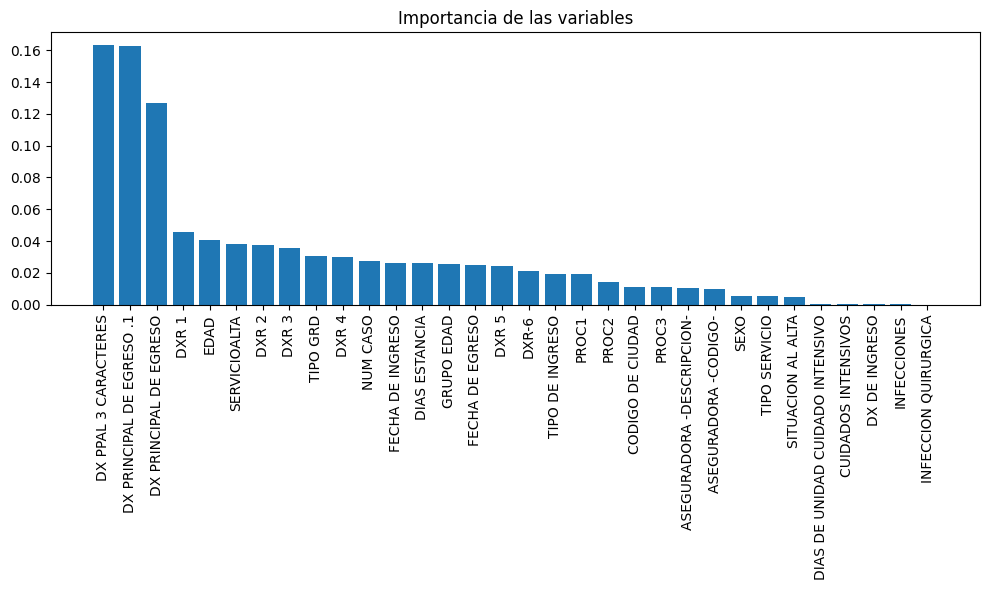

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Cargar los datos normalizados
df = pd.read_csv('DataBaseFinal_Normalizado.csv', sep=';')
df.columns = df.columns.str.strip()

# 2. Cargar el DataFrame original (asegúrate de tenerlo en memoria)
# df_informe = pd.read_csv('ruta_al_archivo_original.csv', sep=';')
# df_informe.columns = df_informe.columns.str.strip()

# 3. Seleccionar los 20 GRD -Código más frecuentes
top_20_grd = df_informe['GRD -Código'].value_counts().nlargest(20).index
mask = df_informe['GRD -Código'].isin(top_20_grd)

# 4. Filtrar ambos DataFrames para que tengan los mismos registros
X = df[mask].drop(['GRD -CODIGO', 'GRD -DESCRIPCION'], axis=1)
y = df_informe.loc[mask, 'GRD -Código'].astype(str)

# 5. Imputar valores nulos en X
for col in X.columns:
    if X[col].dtype == 'object':
        X[col].fillna(X[col].mode()[0], inplace=True)
    else:
        X[col].fillna(X[col].median(), inplace=True)

# 6. One-hot encoding para X
X = pd.get_dummies(X, drop_first=True)

# 7. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 8. Definir el modelo y los parámetros para GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 9. Evaluar el modelo
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Mejores parámetros encontrados:", grid_search.best_params_)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("Precisión en test:", accuracy_score(y_test, y_pred))

# 10. Importancia de variables
importancias = best_rf.feature_importances_
indices = importancias.argsort()[::-1]
plt.figure(figsize=(10,6))
plt.title("Importancia de las variables")
plt.bar(range(X.shape[1]), importancias[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Guardar el modelo
joblib.dump(best_rf, 'modelo_grd.pkl')

# Guardar las columnas de entrada
joblib.dump(X.columns.tolist(), 'columnas_modelo.pkl')

['columnas_modelo.pkl']